<a href="https://colab.research.google.com/github/tsenga2/keio-senga-seminar/blob/main/figure1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# データの準備

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

**ライブラリのインストール**

*   Pandas
*   Matplotlib
*   NmPy
* Cv2


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import cv2

**ファイルのダウンロード**

*   一つ目：東証一部
*   二つ目：東証全体
* 三つ目：2015年基準消費者物価指数
* 四つ目：KahleStulz2017_Figure1


In [ ]:
fileDownloaded = drive.CreateFile({'id': '1PeQWDO2Q4H0UvKrxXpurhDxE8eOf74Ht'})
fileDownloaded.GetContentFile('figure1.csv')
fileDownloaded = drive.CreateFile({'id': '1WWtjjwneBvK3wP0SEDTW4mjLtF6XQ7_M'})
fileDownloaded.GetContentFile('figure1-a.csv')
fileDownloaded = drive.CreateFile({'id': '1tCuKgrUH3E8dgdz_BmOfq3XOBENnEAja'})
fileDownloaded.GetContentFile('zni2015r.csv')
fileDownloaded = drive.CreateFile({'id': '1gs-reZ2BSDtBu12MqxtfM3QOaoWohi7F'})
fileDownloaded.GetContentFile('f1.jpg')

# データの整理

**東証一部のみのデータ**




* 不要な列の消去と名称変更


In [ ]:
df1 = pd.read_csv('figure1.csv',encoding = "cp932")
df1 = df1.drop(columns=['株式コード','日経会社コード','上場コード','銘柄名称'])
df1 = df1.rename(columns={'期間':'Year','時価総額（発行済み株式数ベース）':'Aggregate market capitalization'})
df1.head()

,Year,Aggregate market capitalization
0,1985,2.639471e+10
1,1985,2.631872e+10
2,1985,8.350418e+10
3,1985,8.040000e+10
4,1985,NaN


* 年ごとの時価総額と上場企業数の計算

In [ ]:
Agdata1 = df1.groupby(['Year'],as_index=False)[['Aggregate market capitalization']].sum()
Nmdata1 = df1.groupby(['Year'])[['Aggregate market capitalization']].count()

**東証全体のデータ**

*   東証一部（プライム）
*   東証二部（スタンダード）
*   東証マザーズ（グロース）



* 不要な列の消去と名称変更

In [ ]:
df2 = pd.read_csv('figure1-a.csv',encoding = "cp932")
df2 = df2.drop(columns=['株式コード','日経会社コード','上場コード','銘柄名称'])
df2 = df2.rename(columns={'期間':'Year','時価総額（発行済み株式数ベース）':'Aggregate market capitalization'})
df2.head()

,Year,Aggregate market capitalization
0,1985,2.639471e+10
1,1986,9.062560e+10
2,1987,6.219182e+10
3,1988,7.759817e+10
4,1989,2.005091e+11


* 年ごとの時価総額と上場企業数の計算

In [ ]:
Agdata2 = df2.groupby(['Year'],as_index=False)[['Aggregate market capitalization']].sum()
Nmdata2 = df2.groupby(['Year'])[['Aggregate market capitalization']].count()

**消費者物価指数**


* 要素数の調整



In [ ]:
df3 = pd.read_csv('zni2015r.csv',encoding = "cp932",skiprows=44)
df3.columns=['Year', 'Cpi']
df3['Cpi'] = df3['Cpi'].div(100)
df3.head()

,Year,Cpi
0,1985,0.864
1,1986,0.867
2,1987,0.866
3,1988,0.870
4,1989,0.890
5,1990,0.917
6,1991,0.948
7,1992,0.963
8,1993,0.974
9,1994,0.979


**時価総額の実質化**

In [ ]:
Agdata1['Aggregate market capitalization']=Agdata1['Aggregate market capitalization']*df3['Cpi']
Agdata2['Aggregate market capitalization']=Agdata2['Aggregate market capitalization']*df3['Cpi']

,Year,Aggregate market capitalization
0,1985,1.428994e+14
1,1986,2.172954e+14
2,1987,2.729761e+14
3,1988,3.771452e+14
4,1989,5.024896e+14


**KahleStulz2017_Figure1**

In [ ]:
f1 = cv2.imread('f1.jpg')

# グラフ作成

Text(0.5, 1.0, 'KahleStulz2017_Figure1')

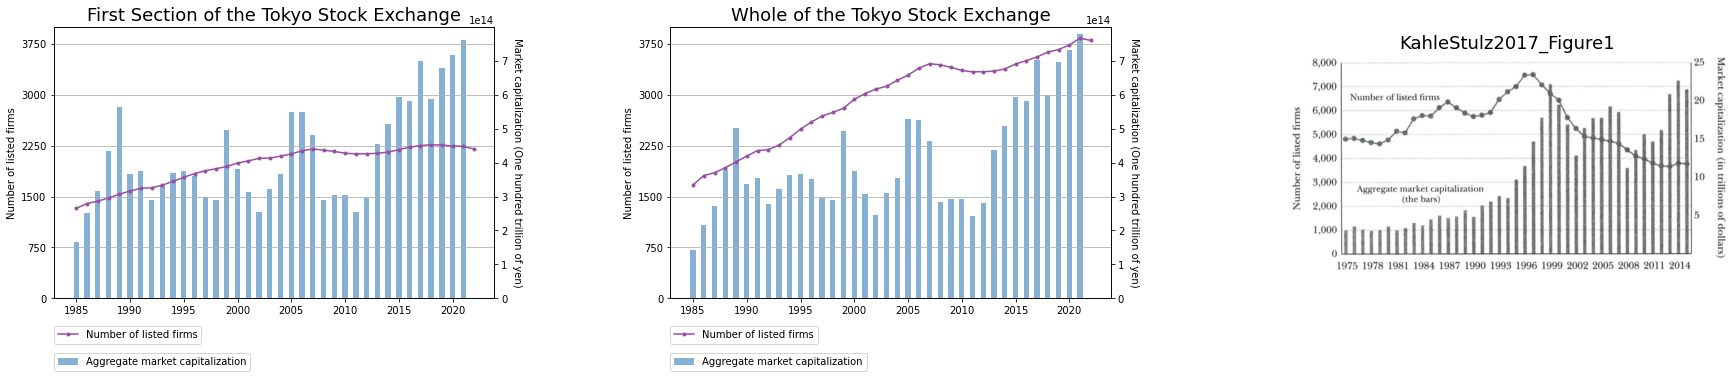

In [ ]:
ncols=3
nrows=1
fig,axes=plt.subplots(figsize=(10*ncols,5*nrows),ncols=ncols,nrows=nrows)
plt.subplots_adjust(wspace=0.4)
axes=np.ravel(axes)

x1 = Agdata1['Year']
y1 = Agdata1['Aggregate market capitalization']

ax1 = axes[0].twinx()
axes[0].plot(Nmdata1,marker=".",color=cm.Set1.colors[3],label="Number of listed firms")
ax1.bar(x1,y1,alpha=0.6,width=0.5,color=cm.Set1.colors[1], label="Aggregate market capitalization")

axes[0].set_ylim([0,4000])
start0, end0 = axes[0].get_ylim()
stepsize=750
axes[0].yaxis.set_ticks(np.arange(start0, end0, stepsize))
ax1.set_ylim([0,8*10**14])
start1, end1 = ax1.get_ylim()
stepsize1=10**14
ax1.yaxis.set_ticks(np.arange(start1, end1, stepsize1))
axes[0].patch.set_alpha(0)
axes[0].set_zorder(2)
ax1.set_zorder(1)
axes[0].grid(axis='y')
axes[0].legend(bbox_to_anchor=(0, -0.1), loc='upper left', borderaxespad=0, fontsize=10)
ax1.legend(bbox_to_anchor=(0, -0.2), loc='upper left', borderaxespad=0, fontsize=10)
axes[0].set_ylabel('Number of listed firms')
ax1.set_ylabel('Market capitalization (One hundred trillion of yen)',labelpad=15,rotation=270)

x2 = Agdata2['Year']
y2 = Agdata2['Aggregate market capitalization']

ax2 = axes[1].twinx()
axes[1].plot(Nmdata2,marker=".",color=cm.Set1.colors[3],label="Number of listed firms")
ax2.bar(x2,y2,alpha=0.6,width=0.5,color=cm.Set1.colors[1], label="Aggregate market capitalization")

axes[1].set_ylim([0,4000])
axes[1].yaxis.set_ticks(np.arange(start0, end0, stepsize))
ax2.set_ylim([0,8*10**14])
ax2.yaxis.set_ticks(np.arange(start1, end1, stepsize1))
axes[1].patch.set_alpha(0)
axes[1].set_zorder(2)
ax2.set_zorder(1)
axes[1].grid(axis='y')
axes[1].legend(bbox_to_anchor=(0, -0.1), loc='upper left', borderaxespad=0, fontsize=10)
ax2.legend(bbox_to_anchor=(0, -0.2), loc='upper left', borderaxespad=0, fontsize=10)
axes[1].set_ylabel('Number of listed firms')
ax2.set_ylabel('Market capitalization (One hundred trillion of yen)',labelpad=15,rotation=270)
axes[0].set_title('First Section of the Tokyo Stock Exchange',fontsize=18)
axes[1].set_title('Whole of the Tokyo Stock Exchange',fontsize=18)

axes[2].imshow(f1) 
axes[2].axis("off")
axes[2].set_title('KahleStulz2017_Figure1',fontsize=18)
